# Polynomial Regression


Formula

y = b0 + b1x1 + b2x1 ^2 + ... + bnx1 ^ n

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
X = dataset.iloc[:, 1:2].values # Aqui coloca o 1:2 para ficar como matriz, e não array
y = dataset.iloc[:, 2].values

# No caso não vamos dividir em train/test porque temos poucos dados e queremos predição precisa

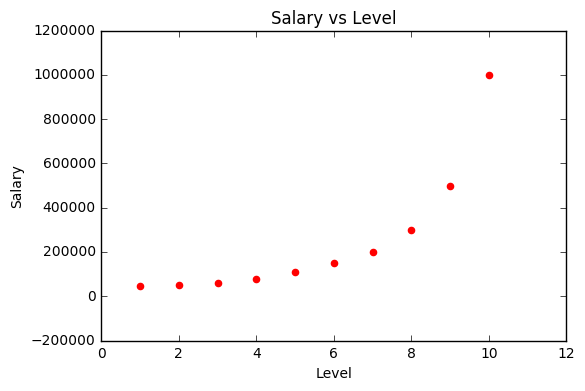

In [6]:
# Plotando os salarios
plt.scatter(X, y, color = 'red')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## Polynomial Regression in python

Primeiro vamos criar o modelo Linear e depois o Polynomial, para comparar os resultados depois.

In [7]:
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
linearRegressor = LinearRegression()

# Create the model using the training dataset
linearRegressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Agora vamos criar o modelo polinomial
from sklearn.preprocessing import PolynomialFeatures

# Essa trecho ira transformar a matriz, adicionando mais colunas X ^ 2, X ^ 3, deacordo com o degree
polyRegressor = PolynomialFeatures(degree = 2)

X_poly = polyRegressor.fit_transform(X)
X_poly

array([[   1.,    1.,    1.],
       [   1.,    2.,    4.],
       [   1.,    3.,    9.],
       [   1.,    4.,   16.],
       [   1.,    5.,   25.],
       [   1.,    6.,   36.],
       [   1.,    7.,   49.],
       [   1.,    8.,   64.],
       [   1.,    9.,   81.],
       [   1.,   10.,  100.]])

In [22]:
# Agora aplica o Linear Regression
polyRegressor2 = LinearRegression()
polyRegressor2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Visualising the prediction

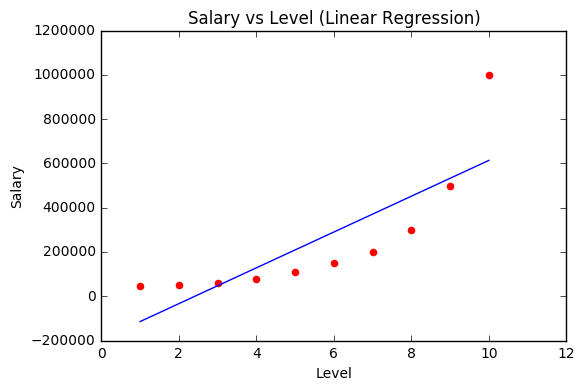

In [25]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linearRegressor.predict(X), color = 'blue')
plt.title('Salary vs Level (Linear Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

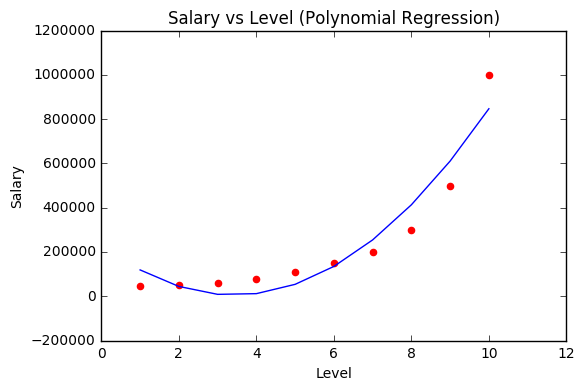

In [29]:
plt.scatter(X, y, color = 'red')
plt.plot(X, polyRegressor2.predict(X_poly), color = 'blue')
plt.title('Salary vs Level (Polynomial Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## Melhorando o modelo

Alterando o degree, podemos criar um modelo que se adapte melhor aos dados

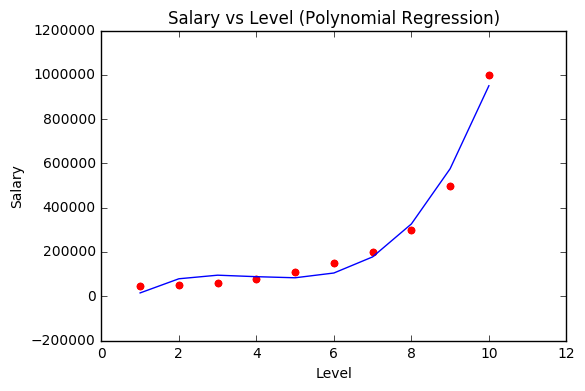

In [37]:
# Essa trecho ira transformar a matriz, adicionando mais colunas X ^ 2, X ^ 3, deacordo com o degree
polyRegressor = PolynomialFeatures(degree = 3)

X_poly = polyRegressor.fit_transform(X)
X_poly

polyRegressor2 = LinearRegression()
polyRegressor2.fit(X_poly, y)

plt.scatter(X, y, color = 'red')
plt.plot(X, polyRegressor2.predict(X_poly), color = 'blue')
plt.title('Salary vs Level (Polynomial Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

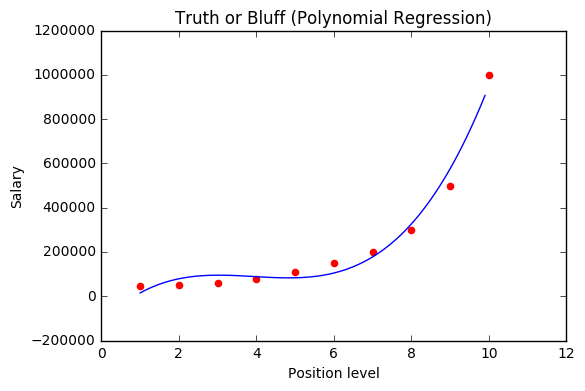

In [38]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, polyRegressor2.predict(polyRegressor.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
